In [1]:
import numpy as np
import numpy.ma as ma
from astropy.table import Table
#from astropy.io import fits
import astropy.units as u
#from astropy.coordinates.sky_coordinate import SkyCoord
#from astroquery.gaia import Gaia
from astropy.units import Quantity
from astropy.visualization import quantity_support
quantity_support()
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
t = Table.read("/n/subaruraid/mpound/serpensRADEC_big.tab",format="ipac")
print(len(t))

4069174


In [3]:

print(matplotlib.rcParams['font.weight'])

normal


In [4]:
yso = Table.read("All_Serpens_YSOc.tab",format='ipac')
#print(yso.colnames)
print(len(yso),np.min(yso["ra"]),np.max(yso["ra"]),np.min(yso["dec"]),np.max(yso["dec"]))

1704 270.2990497 280.1364253 -5.2646164 1.4230765


In [19]:
yso2 = Table.read("/n/subaruraid/mpound/Serpens_ProbGalc-1.47to-0.6+999.tab",format='ipac')
print(len(yso2),np.min(yso2["ra"]),np.max(yso2["ra"]),np.min(yso2["dec"]),np.max(yso2["dec"]))

799 270.3473569 279.9477326 -5.3126991 1.5554372


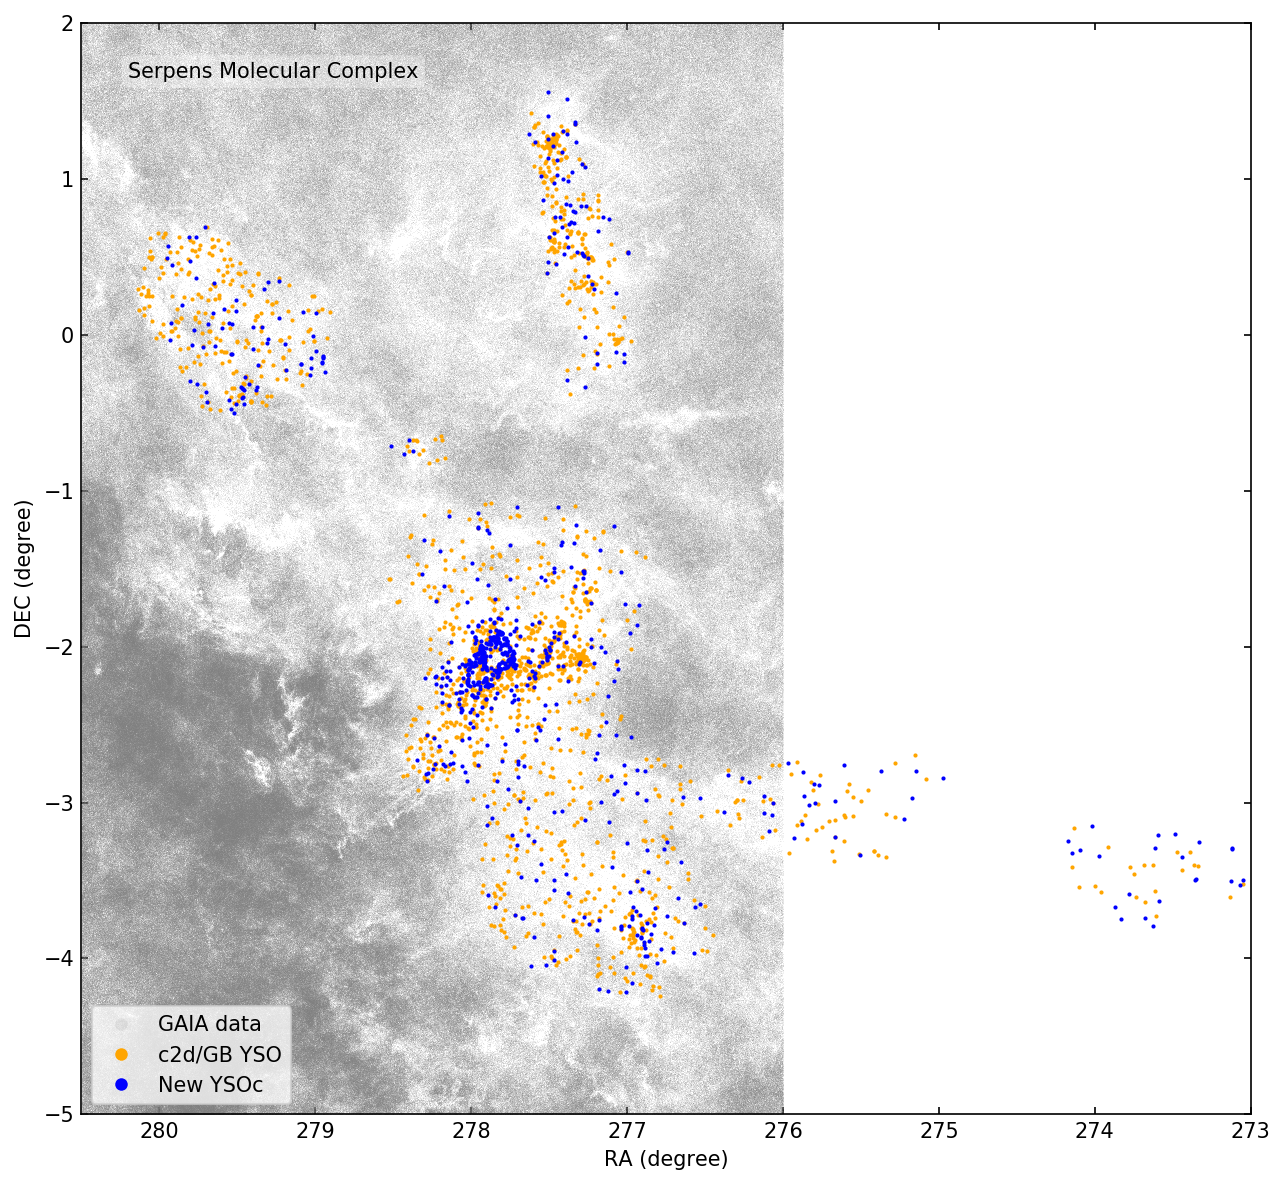

In [24]:
addYSO2=True
matplotlib.rcParams['font.weight'] = 'medium'
font = {'weight': 'medium'}
scale = 1.
dpi = 150.0
h =11.5
w = 8
f = plt.figure(figsize=(h/scale,w/scale),dpi=dpi/scale)
#t["ra"].unit="degree"
#t["dec"].unit="degree"
plt.plot(t["ra"],t["dec"],lw=0,alpha=.25*(dpi/300.),c='gray',linestyle="",mew=0,marker="o",ms=72./f.dpi,label="GAIA data")
plt.plot(yso["ra"],yso["dec"],lw=0,alpha=1,c='orange',linestyle="",mew=0,marker="o",ms=2,label="c2d/GB YSO")
if addYSO2 == True:
    plt.plot(yso2["ra"],yso2["dec"],lw=0,alpha=1,c='blue',linestyle="",mew=0,marker="o",ms=2,label="New YSOc")
lgnd=plt.legend(loc='lower left',numpoints=1,ncol=1, framealpha=0.75,prop={'size':10.0/scale})
for z in lgnd.legendHandles:
    z._legmarker.set_markersize(6)
plt.gca().set_aspect("equal")   
plt.gca().invert_xaxis()
plt.gca().tick_params(axis="both", direction="in",bottom=True,top=True,left=True,right=True)
plt.xlabel("RA (degree)",fontdict=font)
plt.ylabel("DEC (degree)",fontdict=font)
plt.ylim(-5,2)
plt.xlim(280.5,273)
plt.xticks([280,279,278,277,276,275,274,273])
txt = plt.text(280.2,1.65,"Serpens Molecular Complex")
txt.set_bbox(dict(facecolor='white', alpha=0.35,boxstyle='round',edgecolor=None,lw=0))
plt.tight_layout()
#if addYSO2:
#    plt.savefig("SerpGAIA+YSO+YSOc.png")# orientation makes no difference,orientation='portrait')
#else:
#    plt.savefig("SerpGAIA+YSO.png")
plt.show()